In [15]:
import numpy as np
import torch

# give dy/dx as a function of x and y
#dy/dx = x*y
x = torch.arange(-2 , 2 , 0.05 , requires_grad=True).unsqueeze(1)
x0 = torch.tensor([[0.0]], requires_grad=True)  # Point where value is known
y0 = torch.tensor([[0.0]], requires_grad=True)  # Known value at x0
def differential_equation (x:torch.Tensor , y , D ):
    lhs = D
    rhs = torch.exp(x**2)
    return lhs , rhs



In [16]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(1, 50)          # Input layer (1 -> 10 neurons)
        self.hidden_layer1 = nn.Linear(50, 50)      # Hidden layer 1 (10 -> 20 neurons)
        self.hidden_layer2 = nn.Linear(50, 50)      # Hidden layer 2 (20 -> 15 neurons)
        self.hidden_layer3 = nn.Linear(50, 50)       # Hidden layer 3 (15 -> 5 neurons)
        self.output_layer = nn.Linear(50, 1)         # Output layer (5 -> 1 neuron)
        
        # Activation functions
        self.relu = nn.ReLU()
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        self.tanh = nn.Tanh()
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out = self.tanh(self.input_layer(x))
        
        # Hidden layers with Tanh activation for smooth transitions
        out = self.tanh(self.hidden_layer1(out))
        out = self.tanh(self.hidden_layer2(out))
        out = self.tanh(self.hidden_layer3(out))
        
        # Output layer without activation
        out = self.output_layer(out)
        return out

torch.manual_seed = 42

model = NeuralNet()

In [17]:

optimizer = torch.optim.Adam(model.parameters()  , lr = 0.0001 )
loss_fn = nn.MSELoss(reduction='mean')
model.parameters

<bound method Module.parameters of NeuralNet(
  (input_layer): Linear(in_features=1, out_features=50, bias=True)
  (hidden_layer1): Linear(in_features=50, out_features=50, bias=True)
  (hidden_layer2): Linear(in_features=50, out_features=50, bias=True)
  (hidden_layer3): Linear(in_features=50, out_features=50, bias=True)
  (output_layer): Linear(in_features=50, out_features=1, bias=True)
  (relu): ReLU()
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (tanh): Tanh()
)>

In [18]:
epochs = 10000

for epoch in range (epochs):
    model.train()

    # Predict Y and compute derivative D
    Y = model(x)
    D = torch.autograd.grad(Y, x, grad_outputs=torch.ones_like(Y), create_graph=True)[0]

    # Evaluate differential equation loss
    l, r = differential_equation(x, Y, D)
    loss_eq = loss_fn(l, r)

    # Add the initial value constraint loss
    y0_pred = model(x0)
    # D0_pred =torch.autograd.grad(Y0, x0, grad_outputs=torch.ones_like(Y0), create_graph=True)[0]  # Predict y at x0
    loss_initial = loss_fn(y0_pred, y0)
    # Dynamically balance losses
    # weight_eq = 1.0 / (loss_eq.item() + 1e-6)  # Weight for differential equation loss
    # weight_initial = 1.0 / (loss_initial.item() + 1e-6)  # Weight for initial condition loss
    
    # # Weighted total loss
    # loss = weight_eq * loss_eq + weight_initial * loss_initial


    # Total loss
    loss = loss_eq + loss_initial
    # Combine losses logarithmically

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    with torch.inference_mode():
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plotting the solution
with torch.inference_mode():
    final_y = model(x).detach().numpy()




Epoch 0, Loss: 203.29293823242188
Epoch 10, Loss: 202.8120880126953
Epoch 20, Loss: 202.3096466064453
Epoch 30, Loss: 201.76988220214844
Epoch 40, Loss: 201.18299865722656
Epoch 50, Loss: 200.5460205078125
Epoch 60, Loss: 199.8629913330078
Epoch 70, Loss: 199.1444854736328
Epoch 80, Loss: 198.4033966064453
Epoch 90, Loss: 197.64984130859375
Epoch 100, Loss: 196.8876190185547
Epoch 110, Loss: 196.1138458251953
Epoch 120, Loss: 195.32083129882812
Epoch 130, Loss: 194.49844360351562
Epoch 140, Loss: 193.6363067626953
Epoch 150, Loss: 192.7247772216797
Epoch 160, Loss: 191.754638671875
Epoch 170, Loss: 190.7169189453125
Epoch 180, Loss: 189.60279846191406
Epoch 190, Loss: 188.40345764160156
Epoch 200, Loss: 187.1102752685547
Epoch 210, Loss: 185.7145538330078
Epoch 220, Loss: 184.20761108398438
Epoch 230, Loss: 182.5806884765625
Epoch 240, Loss: 180.82460021972656
Epoch 250, Loss: 178.92965698242188
Epoch 260, Loss: 176.88479614257812
Epoch 270, Loss: 174.67745971679688
Epoch 280, Loss: 17

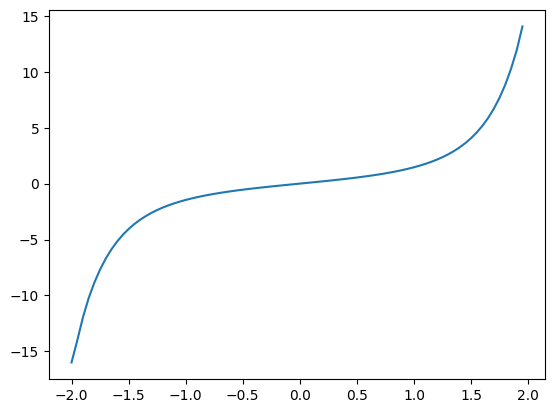

In [19]:
import numpy as np
final_y = model(x)
type(final_y)
final_y = final_y.detach().numpy()
type(final_y)
inp = np.arange(-2,2,0.05)
import matplotlib.pyplot as plt
plt.plot(inp , final_y)

In [20]:
print(model(x0))

tensor([[0.0007]], grad_fn=<AddmmBackward0>)


In [21]:
#pip install torch --upgrade


In [22]:
xtemp = torch.tensor([[2.0]], requires_grad=True)  # Point where value is known
model(xtemp)

tensor([[15.8201]], grad_fn=<AddmmBackward0>)